In [33]:
%matplotlib inline
from time import sleep
from IPython.display import display, clear_output
import matplotlib as mpl
import matplotlib.animation
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

In [13]:
df = pd.read_csv("https://raw.githubuserconimport matplotlib.animationtent.com/jupytercon/2020-ClusteringAlgorithms/master/data/customerdata.csv")

In [14]:
df.head()

,ID,CHURNRISK,GENDER,STATUS,CHILDREN,ESTINCOME,HOMEOWNER,AGE,TOTALDOLLARVALUETRADED,TOTALUNITSTRADED,LARGESTSINGLETRANSACTION,SMALLESTSINGLETRANSACTION,PERCENTCHANGECALCULATION,DAYSSINCELASTLOGIN,DAYSSINCELASTTRADE,NETREALIZEDGAINS_YTD,NETREALIZEDLOSSES_YTD
0,1703,Medium,M,M,2,28766.9,N,47,6110.61,58,1527.6525,152.76525,8.70,2,13,0.0000,152.76525
1,1704,Low,M,M,2,91272.2,Y,25,26992.70,13,13496.3500,1349.63500,3.25,4,10,1349.6350,0.00000
2,1705,Low,F,S,0,73228.3,N,42,22472.25,28,11236.1250,1123.61250,7.00,4,5,1123.6125,0.00000
3,1706,High,M,M,1,64792.3,N,52,13051.31,36,6525.6550,652.56550,9.00,3,6,0.0000,652.56550
4,1707,High,F,S,0,93322.1,Y,40,29922.99,8,14961.4950,1496.14950,2.00,4,9,0.0000,1496.14950


In [15]:
# Creating a column 'PROFIT_YTD' which is NETREALIZEDGAINS_YTD - NETREALIZEDLOSSES_YTD 
keep_columns = ['AGE', 'TOTALUNITSTRADED', 'DAYSSINCELASTTRADE', 'DAYSSINCELASTLOGIN', 'PROFIT_YTD']

known_risk = df['CHURNRISK']

df_churn = df.assign(PROFIT_YTD=df.apply(lambda row: row.NETREALIZEDGAINS_YTD - row.NETREALIZEDLOSSES_YTD, axis=1).values)[keep_columns]

# Features for 3D visualisation
x_name = 'AGE'
y_name = 'PROFIT_YTD'
z_name = 'DAYSSINCELASTTRADE'

df_churn.head()

,AGE,TOTALUNITSTRADED,DAYSSINCELASTTRADE,DAYSSINCELASTLOGIN,PROFIT_YTD
0,47,58,13,2,-152.76525
1,25,13,10,4,1349.63500
2,42,28,5,4,1123.61250
3,52,36,6,3,-652.56550
4,40,8,9,4,-1496.14950


In [16]:
# Generating synthetic dataset with 10 features
n_features = 10
n_samples = 1000
random_state = 100
blobs,blob_labels= make_blobs(n_samples=n_samples, n_features=n_features, random_state=random_state)
blobs_df = pd.DataFrame(blobs, columns=['X', 'Y', 'Z', 'A', 'B', 'C', 'D', 'E', 'F', 'G'])
# Features for 3D visualisation
x_name2 = 'X'
y_name2= 'Y'
z_name2 = 'Z'
blobs_df.head()

,X,Y,Z,A,B,C,D,E,F,G
0,5.736657,-5.495132,-6.225783,-7.679217,-5.675882,10.204134,6.499985,-6.153485,6.012104,-5.607725
1,6.856021,-3.128796,-5.362158,-8.365592,-5.891344,8.623532,8.743615,-7.107779,5.734039,-4.473739
2,-2.632855,8.364998,5.760151,-4.492198,-5.883384,-2.821694,-10.137816,-5.904026,5.706769,-10.675624
3,-0.929539,-5.094169,1.039638,5.257847,-9.899305,-7.026905,3.282882,6.138319,-5.325245,0.459992
4,7.974444,-6.290471,-7.347292,-7.390165,-7.305787,8.869790,6.115273,-7.500320,5.510690,-4.122081


In [17]:
def show_scatter_3d(df, x_name, y_name, z_name, predicted=None, centers=None, marker='o', cmap=None, edgecolors=None, alpha=0.3,
                    elev=25, azim=10, show_colorbar=True,xlim3d=None, ylim3d=None, zlim3d=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x_index = df.columns.get_loc(x_name)
    y_index = df.columns.get_loc(y_name)
    z_index = df.columns.get_loc(z_name)
    
    x = df[x_name]
    y = df[y_name]
    z = df[z_name]

    if centers is not None:
        spot_size=15  # Smaller spots make X more visible
        for center in centers:
            if center is not None:
                ax.scatter(center[x_index], center[y_index], center[z_index], marker="X", s=500, color='red')
    else:
        spot_size=30

    # Pass in cmap if necessary, else get a right-sized list here
    if not cmap:
        cmap = ListedColormap(sns.color_palette("Set2",len(set(predicted))))
    
    chart = ax.scatter(x, y, z, c=predicted, marker=marker, edgecolors=edgecolors, cmap=cmap, s=spot_size, alpha=alpha)
    
    # Add axis labels
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    ax.set_zlabel(z_name)
    
    # Optionally, set the axis limits:
    if xlim3d:
        ax.set_xlim3d(xlim3d)
    if ylim3d:
        ax.set_ylim3d(ylim3d)
    if zlim3d:
        ax.set_zlim3d(zlim3d)

    # Make room for axis titles
    plt.subplots_adjust(bottom=1, top=3, left=0, right=2)
    
    # Chart rotation
    ax.view_init(elev, azim)
    
    if show_colorbar:
        fig.colorbar(chart, ticks=list(set(predicted)))    
    return fig, ax 


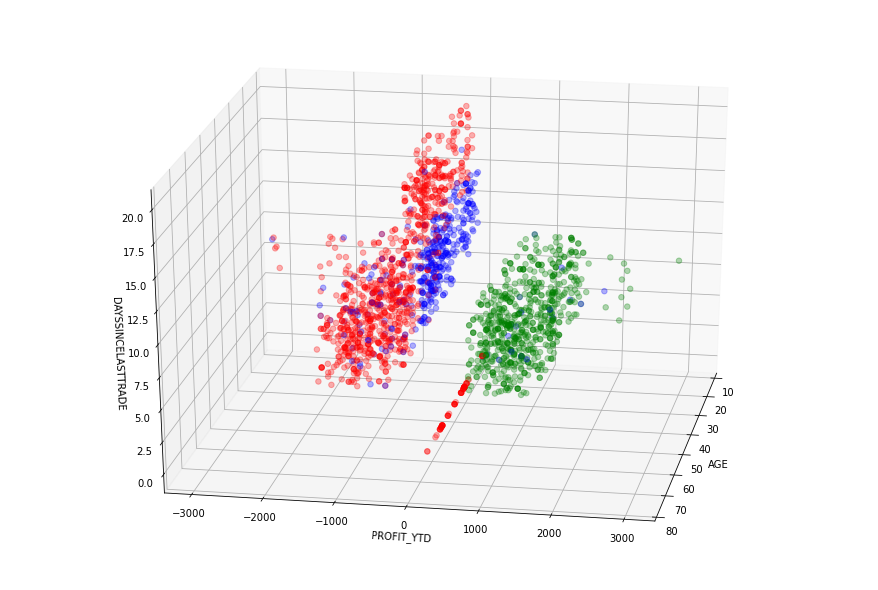

In [18]:
#The data is not clustered here. The difference in colour is based on the "CHURNRISK" column
label_colors = known_risk.map({'High': 'r', 'Medium': 'b', 'Low': 'g'})
show_scatter_3d(df_churn, x_name, y_name, z_name, predicted=label_colors, show_colorbar=False);

In [19]:
#Implementing only i-Forest on consumer data
iforest = IsolationForest(n_estimators=100, contamination=float(.01))
iforest.fit(df_churn[['PROFIT_YTD']])
predicted=iforest.predict(df_churn[['PROFIT_YTD']])
df_churn['anomaly']=pd.Series(predicted)

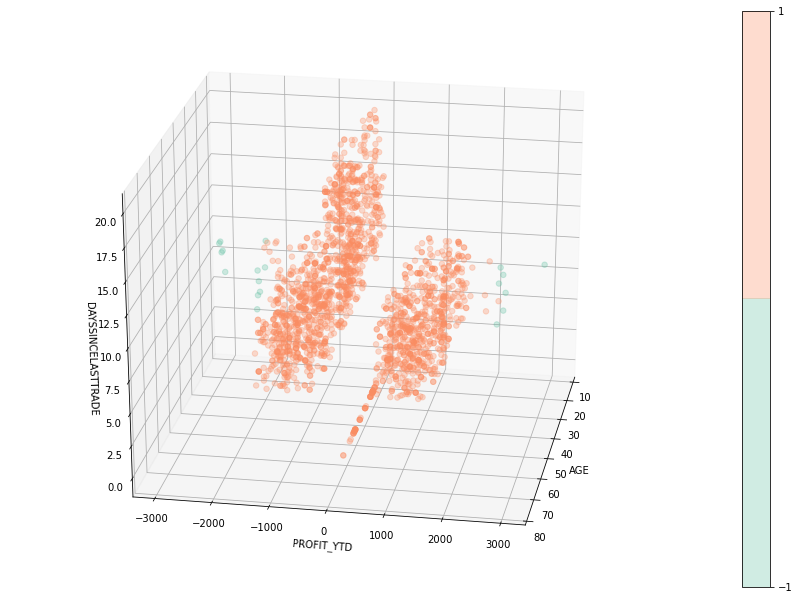

In [20]:
show_scatter_3d(df_churn, x_name, y_name, z_name, predicted=predicted);

In [21]:
#Implementing CBIF on consumer data

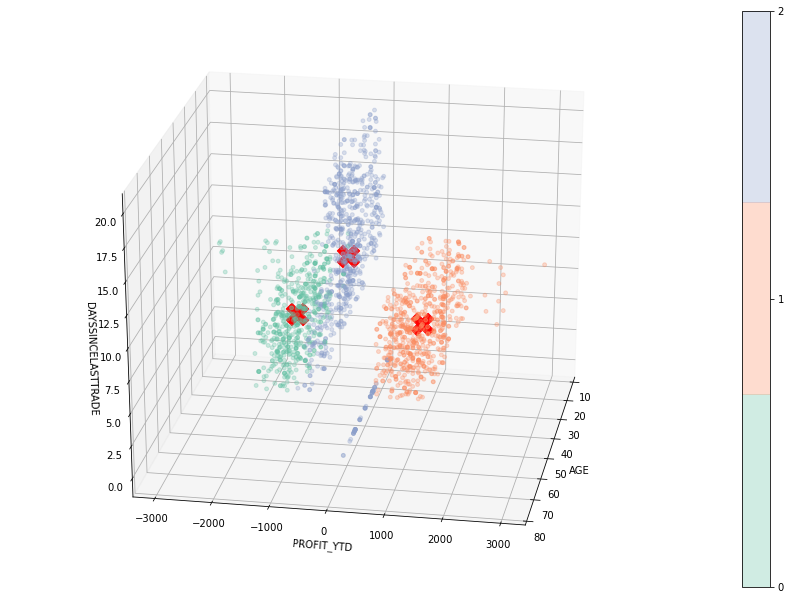

In [22]:
#Implementing K-means clustering on customer data
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
predicted = kmeans.fit_predict(df_churn.values)
centers = kmeans.cluster_centers_
#the cluster number is assigned in a column 'Clusters' in the dataframe
df_churn['Clusters']=predicted
show_scatter_3d(df_churn, x_name, y_name, z_name, predicted=predicted, centers=centers);

In [23]:
predict=np.array([])
df_final=pd.DataFrame()

In [24]:
#Creating iTrees for each cluster in customer data
for i in range(0,3):
    mask = df_churn['Clusters'] == i
    df_new = pd.DataFrame(df_churn[mask])
    iforest = IsolationForest(n_estimators=100, contamination=float(.01))
    iforest.fit(df_new[['PROFIT_YTD']])
    predicted=iforest.predict(df_new[['PROFIT_YTD']])
    predict=np.concatenate((predict, predicted), axis=None)    
    df_new['anomaly']=pd.Series(predicted)
    df_final=df_final.append(df_new)

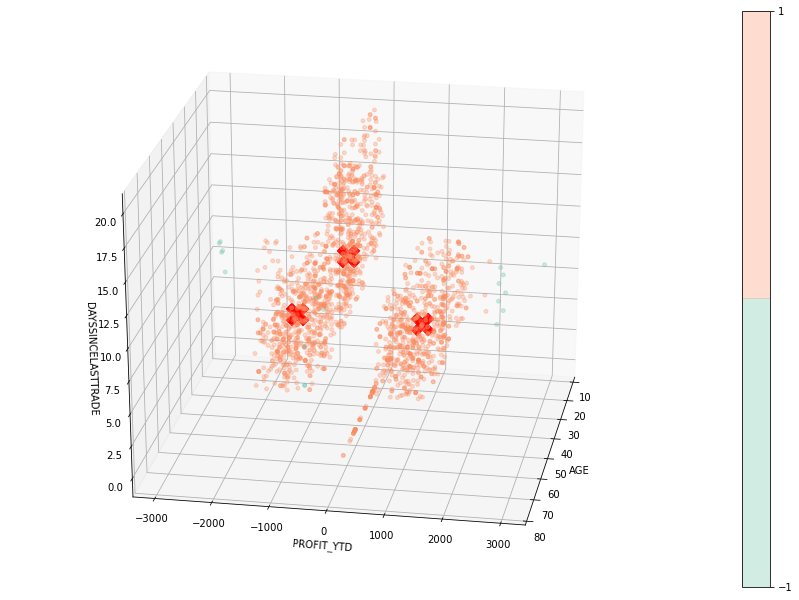

In [25]:
show_scatter_3d(df_final, x_name, y_name, z_name, predicted=predict, centers=centers);


In [26]:
#Implementing i-Forest on Synthetic data
iforest = IsolationForest(n_estimators=100, contamination=float(.01))
iforest.fit(blobs_df[['X']])
predicted=iforest.predict(blobs_df[['X']])
blobs_df['anomaly']=pd.Series(predicted)


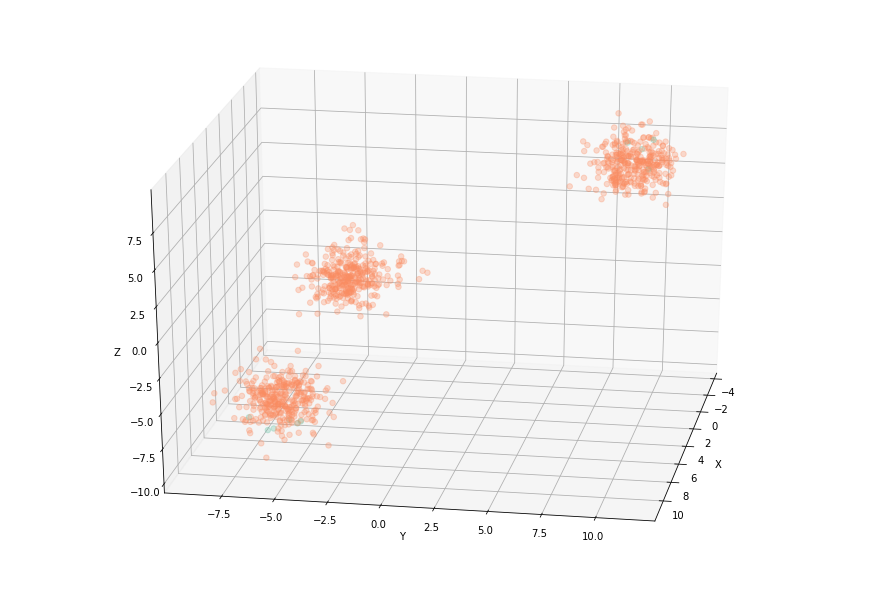

In [27]:
show_scatter_3d(blobs_df, x_name2, y_name2, z_name2, predicted=predicted, show_colorbar=False);

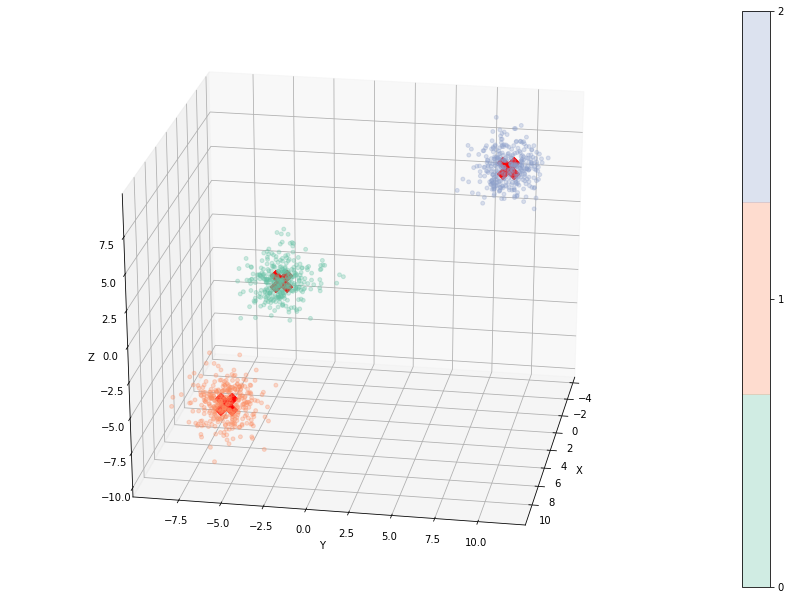

In [28]:
#Implementing K-means clustering on customer data
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
predicted2 = kmeans.fit_predict(blobs_df.values)
centers = kmeans.cluster_centers_
blobs_df['Clusters']=predicted2 #the cluster number is assigned in a column 'Clusters' in the dataframe
show_scatter_3d(blobs_df, x_name2, y_name2, z_name2, predicted=predicted2, centers=centers);


In [29]:
predict2=np.array([])
df_final2=pd.DataFrame()

In [30]:
#Creating iTrees for each cluster in synthetic data
for i in range(0,3):
    mask = blobs_df['Clusters'] == i
    df_new = pd.DataFrame(blobs_df[mask])
    iforest = IsolationForest(n_estimators=100, contamination=float(.01))
    iforest.fit(df_new[['X']])
    predicted=iforest.predict(df_new[['X']])
    predict=np.concatenate((predict, predicted), axis=None)    
    df_new['anomaly']=pd.Series(predicted)
    df_final=df_final.append(df_new)

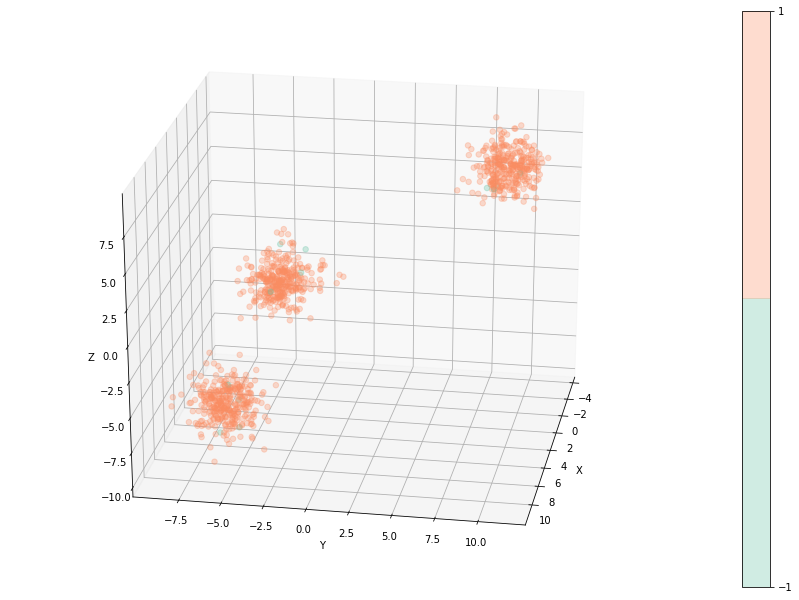

In [31]:
show_scatter_3d(df_final, x_name2, y_name2, z_name2, predicted=predict);